In [ ]:
! nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# 인공지능 & 머신러닝 & 딥러닝을 위해 필요한 재료
1. 데이터가 필요할 것 같습니다.
 - 학습 데이터(training data sample) => 90%, 평가 데이터(validation data sample) => 10%
 - 인풋 이미지 : 고양이, 인풋 이미지의 라벨, - 인풋 이미지 : 고양이 저희가 학습한 모델이 특정 클래스(고양이/강아지) 말할꺼에요
2. 와이파이(인터넷)
Image Classification (분류)
3. 학습 모델이 필요

In [ ]:
import torch

In [ ]:
torch_version = torch.__version__
print(f'torch version: {torch_version}')

torch version: 1.9.0+cu102


In [ ]:
# True가 나오면 cuda를 쓸 수 있다는 뜻임.
# False가 나온다면, 수정 > 노트설정 > gpu로 바꿔보기
print(torch.cuda.is_available())

True


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
input_img = np.zeros((3, 128, 128))   # 3차원의, 128너비, 129 높이의 배열
print(input_img)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
# download training data sample : training data 다운로드
train_data = datasets.FashionMNIST(
    root='data',  # 다운받을 파일의 경로라고 생각
    train=True,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [17]:
validation_data = datasets.FashionMNIST(
    root='data',  # 다운받을 파일의 경로라고 생각
    train=False,
    download=True,
    transform=ToTensor()
)

In [19]:
print(train_data.train_labels.size())   # torch.Size([60000])
print(validation_data.test_labels.size())   # torch.Size([10000])

torch.Size([60000])
torch.Size([10000])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [20]:
fig = plt.figure(figsize=(8, 8))

<Figure size 576x576 with 0 Axes>

In [21]:
fig = plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

In [26]:
columns, rows = 4, 4
for idx in range(1, columns * rows + 1, 1):
  random_index = torch.randint(len(train_data), size=(1,)).item()
  print(random_index)

56434
24521
3475
24934
40013
8166
27644
26371
18189
46368
38140
3725
58202
25172
6241
24156


In [28]:
columns, rows = 4, 4
for idx in range(columns * rows + 1):
    random_index = torch.randint(len(train_data), size=(1,)).item()
    input_img, input_label = train_data[random_index]
    print(input_img.size())

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


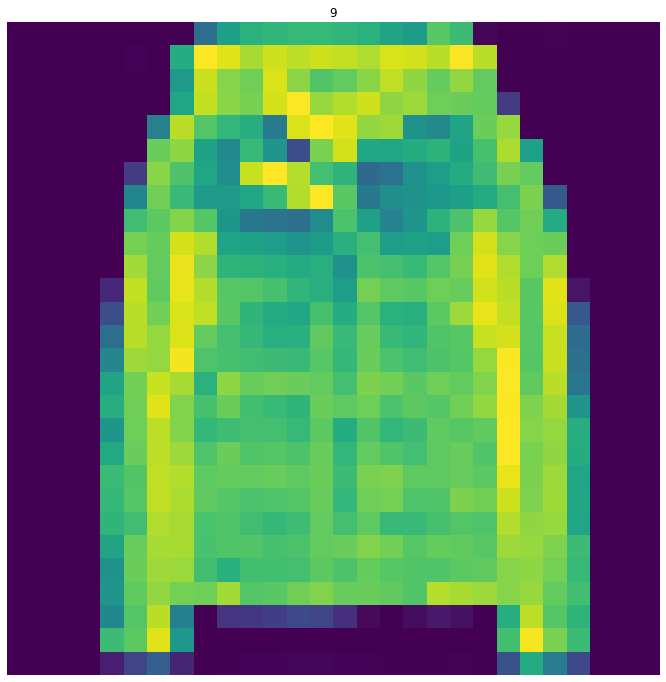

In [31]:
del fig

fig = plt.figure(figsize=(12,12))
columns, rows = 3,3
# image visualization
for idx in range(1, columns * rows + 1):
  random_idx = torch.randint(len(train_data), size=(1,)).item()
  input_img, input_label = train_data[random_index]
  plt.title(f'{idx}')
  plt.axis('off')
  plt.imshow(input_img.squeeze())
plt.show()
